In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Data/20200416-WHO.csv')
df

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case
0,China,83797,52,3352,0,Clusters of cases,0
1,South Korea,10613,22,229,4,Clusters of cases,0
2,Japan,8582,482,136,17,Clusters of cases,0
3,Australia,6458,42,63,2,Clusters of cases,0
4,Philippines,5453,230,349,14,Clusters of cases,0
...,...,...,...,...,...,...,...
206,São Tomé and,4,0,0,0,Pending,9
207,South Sudan,4,0,0,0,Pending,4
208,Réunion,390,0,0,0,Clusters of cases,2
209,Mayotte,221,4,3,0,Clusters of cases,0


In [2]:
#removing the Diamong princess cruiser because this analysis is restricted to countries and territories
#removendo o cruizeiro Diamond princess porque esta análise se restringe a países e territórios
df = df[df['Country/Territory'] != 'conveyance (Diamond']

In [3]:
#addind the death rate to the data/adicionando a taxa de mortalidade
death_rate = df.loc[:,'Total Deaths']/df.loc[:,'Total Confirmed']*100
df.loc[:,'Death Rate'] = death_rate
df

c:\users\ricardo_2\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\ricardo_2\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
0,China,83797,52,3352,0,Clusters of cases,0,4.000143
1,South Korea,10613,22,229,4,Clusters of cases,0,2.157731
2,Japan,8582,482,136,17,Clusters of cases,0,1.584712
3,Australia,6458,42,63,2,Clusters of cases,0,0.975534
4,Philippines,5453,230,349,14,Clusters of cases,0,6.400147
...,...,...,...,...,...,...,...,...
205,Burundi,5,0,0,0,Sporadic cases,3,0.000000
206,São Tomé and,4,0,0,0,Pending,9,0.000000
207,South Sudan,4,0,0,0,Pending,4,0.000000
208,Réunion,390,0,0,0,Clusters of cases,2,0.000000


In [4]:
#adding the population per country/adicionando a população do país
WorldPopulation = pd.read_csv('Data/WorldPopulation.csv')
for i in range (0,len(df)):
    pop = WorldPopulation.loc[WorldPopulation.loc[:,'Country/Territory']==df.loc[i,'Country/Territory']]
    if pop.empty == True:
        df.loc[i,'Population'] = 0
    else:
        df.loc[i,'Population'] = pop.iloc[0,1]

#calculating the % of contaminated population/calculando a % da população contaminada
for i in range (0,len(df)):
    if df.loc[i,'Population'] != 0:
        df.loc[i,'Population Contaminated %'] = df.loc[i,'Total Confirmed']/df.loc[i,'Population']*100
    else:
        df.loc[i,'Population Contaminated %'] = 0

#calculating the % of deaths per population/calculando a % de mortos por população 
for i in range (0,len(df)):
    if df.loc[i,'Population'] != 0:
        df.loc[i,'Population Death Rate %'] = df.loc[i,'Total Deaths']/df.loc[i,'Population']*100
    else:
        df.loc[i,'Population Death Rate %'] = 0
df

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate,Population,Population Contaminated %,Population Death Rate %
0,China,83797,52,3352,0,Clusters of cases,0,4.000143,1.439324e+09,0.005822,0.000233
1,South Korea,10613,22,229,4,Clusters of cases,0,2.157731,5.126918e+07,0.020701,0.000447
2,Japan,8582,482,136,17,Clusters of cases,0,1.584712,1.264765e+08,0.006785,0.000108
3,Australia,6458,42,63,2,Clusters of cases,0,0.975534,2.549988e+07,0.025326,0.000247
4,Philippines,5453,230,349,14,Clusters of cases,0,6.400147,1.095811e+08,0.004976,0.000318
...,...,...,...,...,...,...,...,...,...,...,...
205,Burundi,5,0,0,0,Sporadic cases,3,0.000000,1.189078e+07,0.000042,0.000000
206,São Tomé and,4,0,0,0,Pending,9,0.000000,0.000000e+00,0.000000,0.000000
207,South Sudan,4,0,0,0,Pending,4,0.000000,1.119372e+07,0.000036,0.000000
208,Réunion,390,0,0,0,Clusters of cases,2,0.000000,8.953120e+05,0.043560,0.000000


In [5]:
#verifying the total number of countries infected
#verificando o total de países contaminados
countries_infected = len(df)
print('The total number of countries infected is:\n',countries_infected)

The total number of countries infected is:
 210


In [6]:
Transmission_type = pd.get_dummies(df, columns=['Transmission Classification'])
Transmission_type

print('The number of countries only experiencing cases, clustered in time, geographic location and/or by common exposures is:\n',
      Transmission_type.iloc[:,10].sum())

print('\nThe number of countries experiencing larger outbreaks of local transmission defined through an assessment of factors\n including, but not limited to:\n- Large numbers of cases not linkable to transmission chains\n- Large numbers of cases from sentinel lab surveillance\n- Multiple unrelated clusters in several areas of the country/territory/area,\n is:\n',
      Transmission_type.iloc[:,11].sum()+ Transmission_type.iloc[:,12].sum())
      
print('\nThe number of countries under investigation to determine the type of transmission is:\n',
      Transmission_type.iloc[:,13].sum())

print('\nThe number of countries with one or more cases, imported or locally detected is:\n',
      Transmission_type.iloc[:,14].sum())



The number of countries only experiencing cases, clustered in time, geographic location and/or by common exposures is:
 77

The number of countries experiencing larger outbreaks of local transmission defined through an assessment of factors
 including, but not limited to:
- Large numbers of cases not linkable to transmission chains
- Large numbers of cases from sentinel lab surveillance
- Multiple unrelated clusters in several areas of the country/territory/area,
 is:
 24

The number of countries under investigation to determine the type of transmission is:
 51

The number of countries with one or more cases, imported or locally detected is:
 58


In [7]:
#Death rate graphs preparation/preparação para a apresentação dos gráficos da taxa de mortalidade
DeathRate = df.sort_values(by=['Death Rate'],ascending=False)

DeathRate[0:30]#top30

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate,Population,Population Contaminated %,Population Death Rate %
153,Sint Maarten,53,1,9,0,Clusters of cases,0,16.981132,42876.0,0.123612,0.020991
134,Bahamas,49,0,8,0,Clusters of cases,1,16.326531,393244.0,0.012460,0.002034
22,France,105155,2622,17146,1438,Pending,0,16.305454,65273511.0,0.161099,0.026268
108,Sudan,32,0,5,0,Sporadic cases,1,15.625000,43849260.0,0.000073,0.000011
165,Algeria,2160,90,336,10,Community\rtransmission,0,15.555556,43851044.0,0.004926,0.000766
18,Northern Mariana,13,0,2,0,Pending,1,15.384615,0.0,0.000000,0.000000
204,Mauritania,7,0,1,0,Sporadic cases,5,14.285714,4649658.0,0.000151,0.000022
25,Belgium,33573,2454,4440,283,Pending,0,13.224913,11589623.0,0.289682,0.038310
20,Italy,165155,2667,21647,578,Pending,0,13.107081,60461826.0,0.273156,0.035803
23,United Kingdom,98480,4603,12868,761,Pending,0,13.066613,67886011.0,0.145067,0.018955


In [8]:
#mnc = minimum number of cases/número mínimo de casos
mnc = 1000 #define the minimum number of cases here/defina o número mínimo de casos aqui

DeathRate_mnc = DeathRate[DeathRate['Total Confirmed'] > mnc]
DeathRate_mnc = DeathRate_mnc.reset_index(drop=True)
DeathRate_mnc.index = np.arange(1, (len(DeathRate_mnc)+1))

DeathRate_mnc[0:30]#top30 with mnc estabilished, top30 para o número mínimo de casos estipulado

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate,Population,Population Contaminated %,Population Death Rate %
1,France,105155,2622,17146,1438,Pending,0,16.305454,6.527351e+07,0.161099,0.026268
2,Algeria,2160,90,336,10,Community\rtransmission,0,15.555556,4.385104e+07,0.004926,0.000766
3,Belgium,33573,2454,4440,283,Pending,0,13.224913,1.158962e+07,0.289682,0.038310
4,Italy,165155,2667,21647,578,Pending,0,13.107081,6.046183e+07,0.273156,0.035803
5,United Kingdom,98480,4603,12868,761,Pending,0,13.066613,6.788601e+07,0.145067,0.018955
6,Netherlands,28153,734,3134,189,Pending,0,11.132029,1.713487e+07,0.164302,0.018290
7,Spain,177633,5092,18579,523,Pending,0,10.459205,4.675478e+07,0.379925,0.039737
8,Sweden,11927,482,1203,170,Pending,0,10.086359,1.009926e+07,0.118098,0.011912
9,Indonesia,5136,297,469,10,Community\rtransmission,0,9.131620,2.735236e+08,0.001878,0.000171
10,Hungary,1652,73,142,8,Pending,0,8.595642,9.660351e+06,0.017101,0.001470


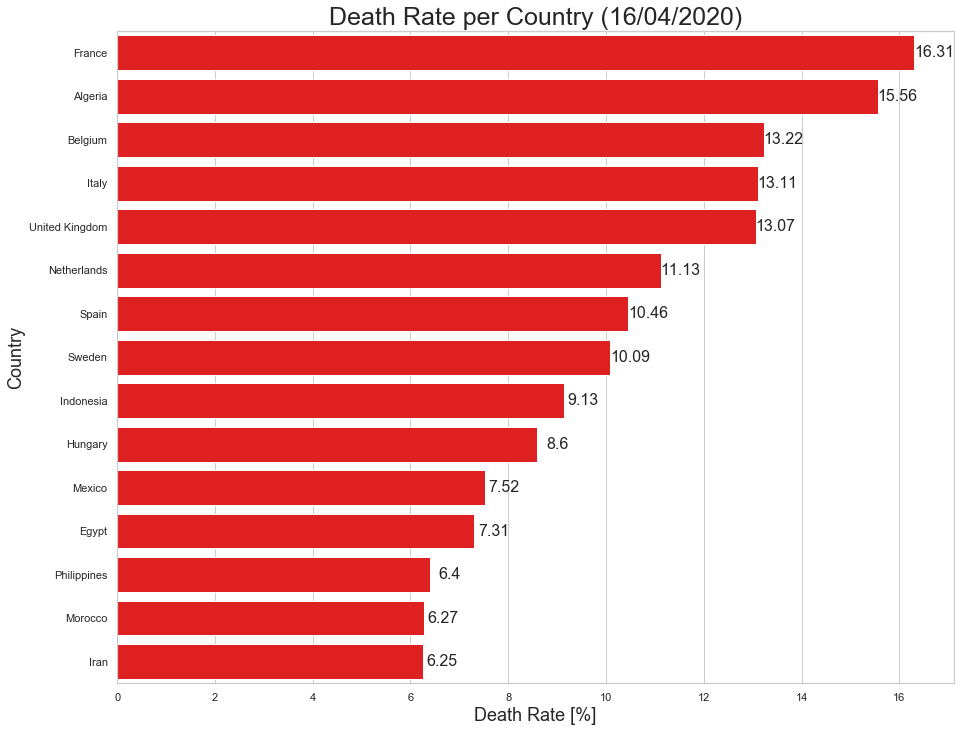

In [9]:
#seaborn defaults
sns.set(style="whitegrid")

top15_DeathRate = DeathRate_mnc[0:15]
death_rate = top15_DeathRate.round({'Death Rate':2})
death_rate = death_rate['Death Rate']

f, ax = plt.subplots(figsize=(15, 12))

sns.set_color_codes("muted")
sns.barplot(x='Death Rate',y='Country/Territory', data=top15_DeathRate ,
            label="Deaths", color="red")
plt.title('Death Rate per Country (16/04/2020)',fontsize=25)
plt.xlabel('Death Rate [%]',fontsize=18)
plt.ylabel('Country',fontsize=18)

for i in range (0,15):
    plt.text(x=death_rate.iloc[i]+0.4, y=i , s=death_rate.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=16)
plt.savefig('Graphs/20200416_DeathRatePerCountry.png', bbox_inches='tight')
plt.show()


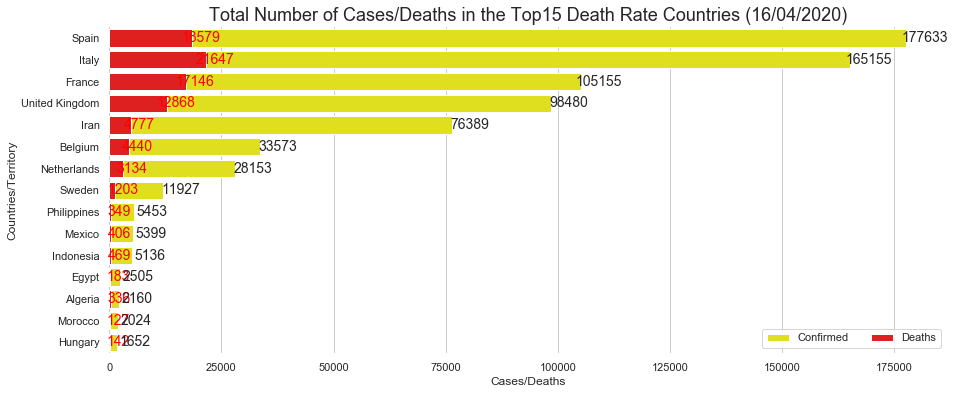

In [10]:
#In the next graph the order will be set by the total number of confirmed cases in the previous countries
#No próximo gráfico a ordem será por número total de casos nos países anteriores

top15_confirmed = top15_DeathRate.sort_values(by=['Total Confirmed'],ascending=False)
countries = np.array(top15_confirmed['Country/Territory'])
confirmed = np.array(top15_confirmed['Total Confirmed'])
deaths = np.array(top15_confirmed['Total Deaths'])
diference = confirmed - deaths

#seaborn defaults
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 6))


sns.set_color_codes("pastel")
sns.barplot(x='Total Confirmed',y='Country/Territory', data=top15_confirmed,
            label="Confirmed", color="yellow")
sns.set_color_codes("muted")
sns.barplot(x='Total Deaths',y='Country/Territory', data=top15_confirmed ,
            label="Deaths", color="red")


plt.title('Total Number of Cases/Deaths in the Top15 Death Rate Countries (16/04/2020)',fontsize=18)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Countries/Territory",
       xlabel="Cases/Deaths")
for i in range (0,15):
    plt.text(x=deaths[i]+1900, y=i , s=deaths[i],horizontalalignment='center',verticalalignment='center', color='red',fontsize=14)
    plt.text(x=confirmed[i]+4000, y=i , s=confirmed[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
sns.despine(left=True, bottom=True)
plt.savefig('Graphs/20200416_TotalNumberCasesDeaths.png', bbox_inches='tight')

In [11]:
#DSLRC = days since last reported case / dias desde o último caso reportado
#preparation for the DSLRC graphs / preparação para os gráficos DSLRC
DSLRC = df.sort_values(by=['Days since last reported case'],ascending=False)
DSLRC[0:30] #top30 DSLRC

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate,Population,Population Contaminated %,Population Death Rate %
159,Saint Barthélemy,6,0,0,0,Sporadic cases,16,0.000000,0.0,0.000000,0.000000
162,British Virgin Islands,3,0,0,0,Sporadic cases,15,0.000000,30231.0,0.009924,0.000000
88,Bhutan,5,0,0,0,Sporadic cases,13,0.000000,771608.0,0.000648,0.000000
17,New Caledonia,18,0,0,0,Sporadic cases,13,0.000000,285498.0,0.006305,0.000000
161,Anguilla,3,0,0,0,Sporadic cases,12,0.000000,15003.0,0.019996,0.000000
144,Suriname,10,0,1,0,Sporadic cases,12,10.000000,586632.0,0.001705,0.000170
197,Namibia,16,0,0,0,Sporadic cases,10,0.000000,2540905.0,0.000630,0.000000
78,Greenland,11,0,0,0,Pending,10,0.000000,56770.0,0.019376,0.000000
201,Seychelles,11,0,0,0,Sporadic cases,9,0.000000,98347.0,0.011185,0.000000
206,São Tomé and,4,0,0,0,Pending,9,0.000000,0.0,0.000000,0.000000


c:\users\ricardo_2\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ricardo_2\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


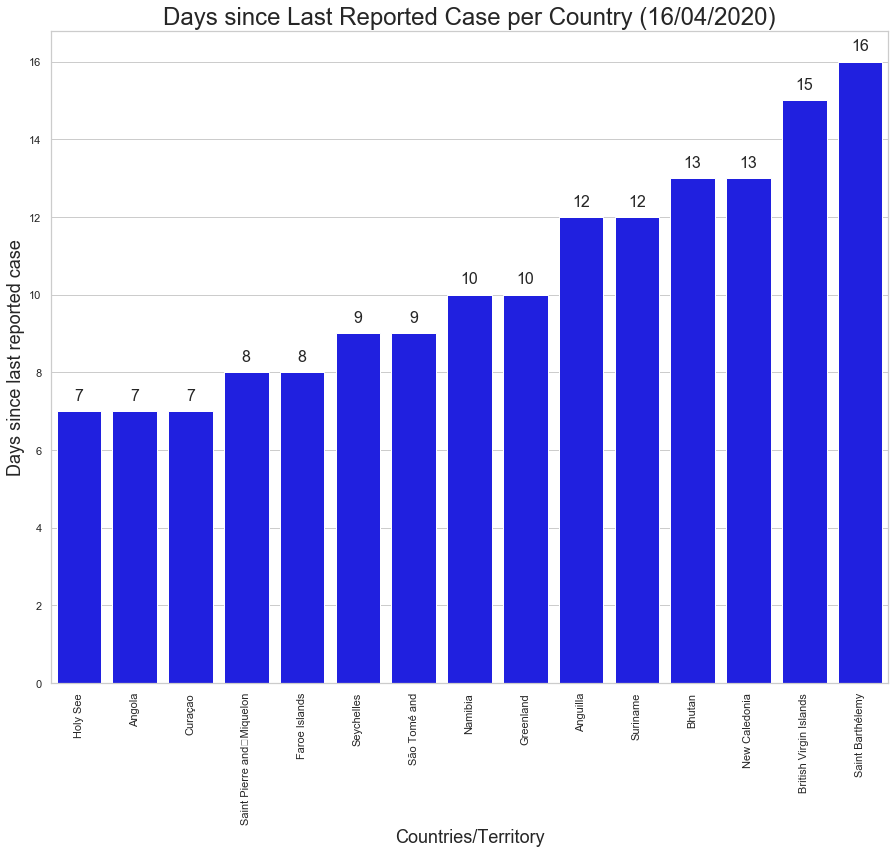

In [12]:
#seaborn defaults
top15DSLRC = DSLRC[0:15].sort_values(by=['Days since last reported case'])
DSLRC_array = top15DSLRC['Days since last reported case']

f, ax = plt.subplots(figsize=(15, 12))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Country/Territory',y='Days since last reported case', data=top15DSLRC ,
            label="Days since last reported case", color="blue")
plt.title('Days since Last Reported Case per Country (16/04/2020)',fontsize=24)
plt.ylabel('Days since last reported case',fontsize=18)
plt.xlabel('Countries/Territory',fontsize=18)
plt.xticks(rotation='vertical')
for i in range (0,15):
    plt.text(x=i, y=DSLRC_array.iloc[i]+0.4 , s=DSLRC_array.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=16)
plt.savefig('Graphs/20200416_DaysSinceLast.png', bbox_inches='tight')
plt.show()

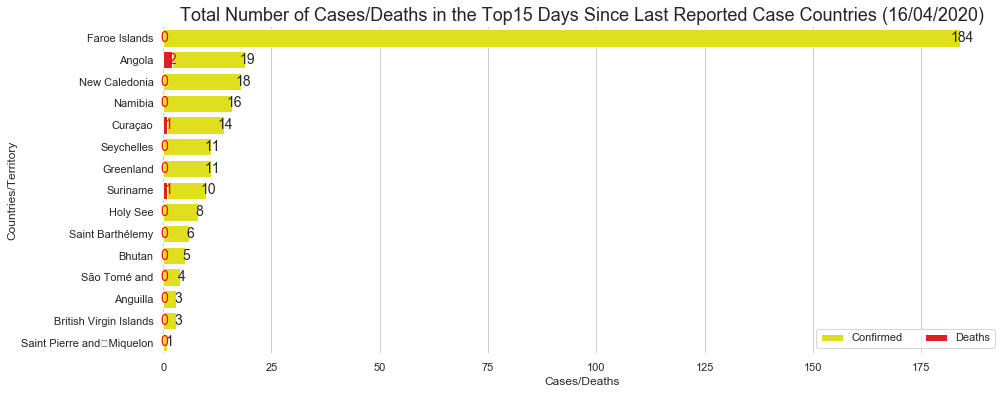

In [13]:
#In the next graph the order will be set by the total number of confirmed cases in the previous countries
#No próximo gráfico a ordem será por número total de casos nos países anteriores
#seaborn defaults

top15DSLRC_confirmed_descending = top15DSLRC.sort_values(by=['Total Confirmed'],ascending=False)
confirmedDSLRC = np.array(top15DSLRC_confirmed_descending['Total Confirmed'])
deathsDSLRC = np.array(top15DSLRC_confirmed_descending['Total Deaths'])
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 6))


sns.set_color_codes("pastel")
sns.barplot(x='Total Confirmed',y='Country/Territory', data=top15DSLRC_confirmed_descending,
            label="Confirmed", color="yellow")
sns.set_color_codes("muted")
sns.barplot(x='Total Deaths',y='Country/Territory', data=top15DSLRC_confirmed_descending ,
            label="Deaths", color="red")


plt.title('Total Number of Cases/Deaths in the Top15 Days Since Last Reported Case Countries (16/04/2020)',fontsize=18)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Countries/Territory",
       xlabel="Cases/Deaths")
for i in range (0,15):
    plt.text(x=deathsDSLRC[i]+0.2, y=i , s=deathsDSLRC[i],horizontalalignment='center',verticalalignment='center', color='red',fontsize=14)
    plt.text(x=confirmedDSLRC[i]+0.4, y=i , s=confirmedDSLRC[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
sns.despine(left=True, bottom=True)
plt.savefig('Graphs/20200416_TotalNumberCasesDeathsDSLRC.png', bbox_inches='tight')

In [14]:
#preparation of the graphs of Population contaminated
#preparação dos gráficos da População contaminada

PopContaminated = df.sort_values(by=['Population Contaminated %'],ascending=False)

#mnc = minimum number of cases/número mínimo de casos
mnc = 1 #define the minimum number of cases here/defina o número mínimo de casos aqui

PopMNC = PopContaminated[PopContaminated['Total Confirmed'] > mnc]
PopMNC = PopMNC.reset_index(drop=True)
PopMNC.index = np.arange(1, (len(PopMNC)+1))

top15_contaminated = PopMNC[0:15]
contamination_rate = top15_contaminated.round({'Population Contaminated %':4})
contamination_rate = contamination_rate['Population Contaminated %']

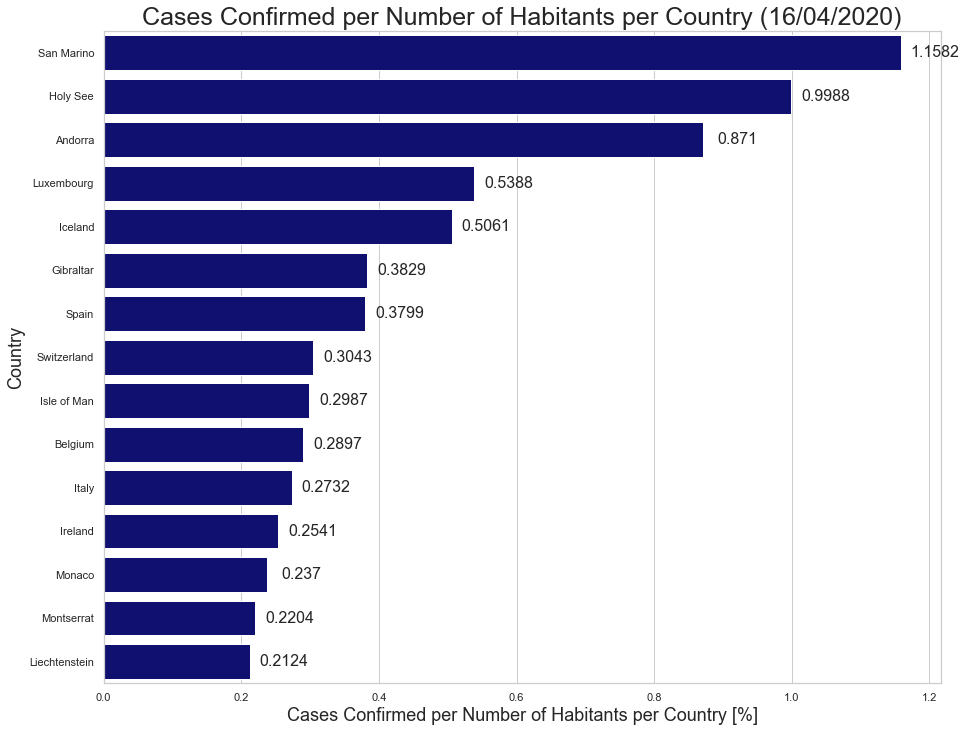

In [15]:
#seaborn defaults
f, ax = plt.subplots(figsize=(15, 12))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Population Contaminated %',y='Country/Territory', data=top15_contaminated ,
            label="Deaths", color="navy")
plt.title('Cases Confirmed per Number of Habitants per Country (16/04/2020)',fontsize=25)
plt.xlabel('Cases Confirmed per Number of Habitants per Country [%]',fontsize=18)
plt.ylabel('Country',fontsize=18)

for i in range (0,15):
    plt.text(x=contamination_rate.iloc[i]+0.05, y=i , s=contamination_rate.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=16)
plt.savefig('Graphs/20200416_ContaminationPerCountry.png', bbox_inches='tight')
plt.show()

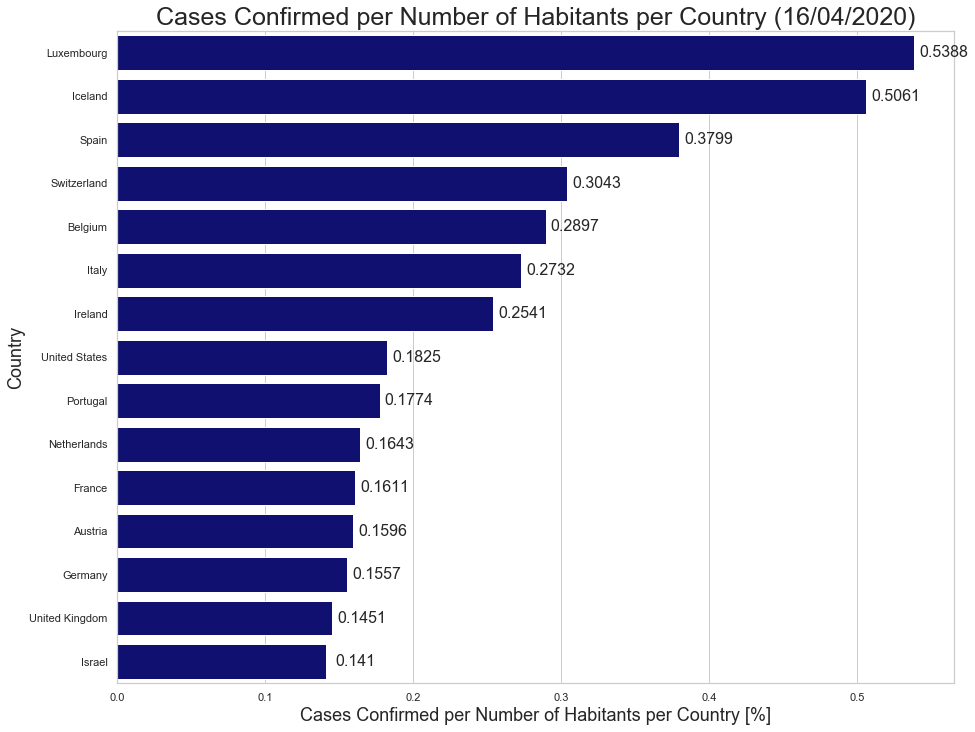

In [16]:
#Population contaminated in countries with at least 1000 cases confirmed
#População contaminada em páises com no mínimo 1000 casos confirmados 

#mnc = minimum number of cases/número mínimo de casos
mnc = 1000 #define the minimum number of cases here/defina o número mínimo de casos aqui

PopMNC = PopContaminated[PopContaminated['Total Confirmed'] > mnc]
PopMNC = PopMNC.reset_index(drop=True)
PopMNC.index = np.arange(1, (len(PopMNC)+1))

top15_contaminated = PopMNC[0:15]
contamination_rate = top15_contaminated.round({'Population Contaminated %':4})
contamination_rate = contamination_rate['Population Contaminated %']
#seaborn defaults
f, ax = plt.subplots(figsize=(15, 12))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Population Contaminated %',y='Country/Territory', data=top15_contaminated ,
            label="Deaths", color="navy")
plt.title('Cases Confirmed per Number of Habitants per Country (16/04/2020)',fontsize=25)
plt.xlabel('Cases Confirmed per Number of Habitants per Country [%]',fontsize=18)
plt.ylabel('Country',fontsize=18)

for i in range (0,15):
    plt.text(x=contamination_rate.iloc[i]+0.02, y=i , s=contamination_rate.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=16)
plt.savefig('Graphs/20200416_ContaminationPerCountry1kCases.png', bbox_inches='tight')
plt.show()

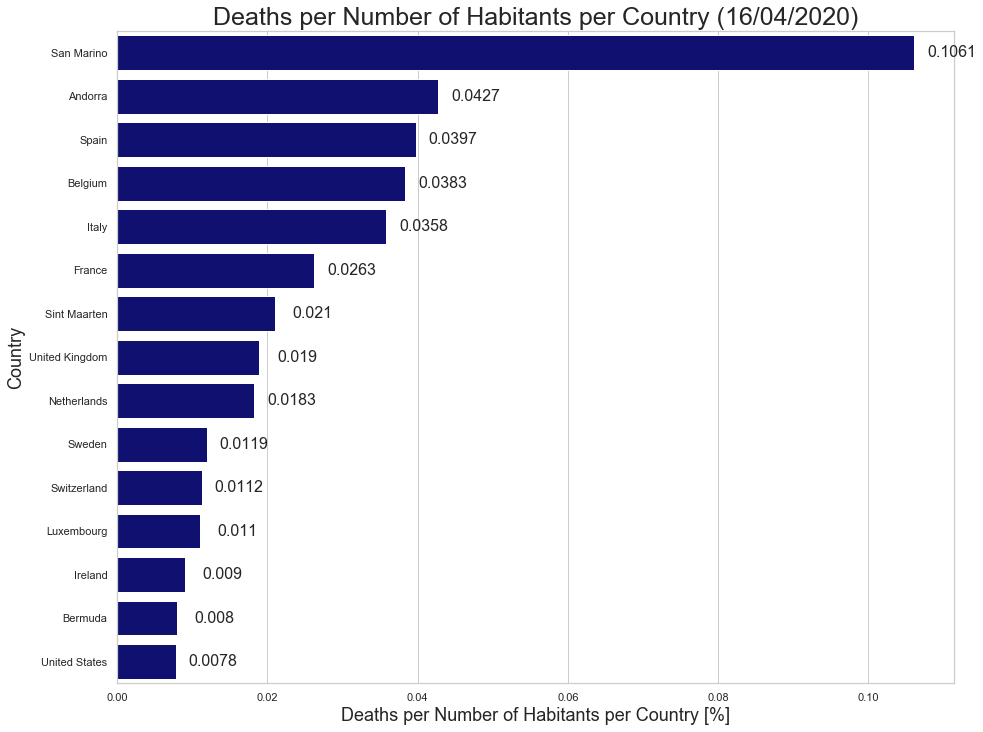

In [17]:
#preparation of the graphs of deaths per Population
#preparação dos gráficos de mortes por População

PopDeathRate = df.sort_values(by=['Population Death Rate %'],ascending=False)

#mnc = minimum number of cases/número mínimo de casos
mnc = 1 #define the minimum number of cases here/defina o número mínimo de casos aqui

PopDeathRateMNC = PopDeathRate[PopDeathRate['Total Confirmed'] > mnc]
PopDeathRateMNC = PopDeathRateMNC.reset_index(drop=True)
PopDeathRateMNC.index = np.arange(1, (len(PopDeathRateMNC)+1))
top15_PopDeathRate = PopDeathRateMNC[0:15]
popDeath_rate = top15_PopDeathRate.round({'Population Death Rate %':4})
popDeath_rate = popDeath_rate['Population Death Rate %']

#seaborn defaults
f, ax = plt.subplots(figsize=(15, 12))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Population Death Rate %',y='Country/Territory', data=top15_PopDeathRate ,
            label="Deaths", color="navy")
plt.title('Deaths per Number of Habitants per Country (16/04/2020)',fontsize=25)
plt.xlabel('Deaths per Number of Habitants per Country [%]',fontsize=18)
plt.ylabel('Country',fontsize=18)

for i in range (0,15):
    plt.text(x=popDeath_rate.iloc[i]+0.005, y=i , s=popDeath_rate.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=16)
plt.savefig('Graphs/20200416_DeathRateinPopPerCountryCases.png', bbox_inches='tight')
plt.show()

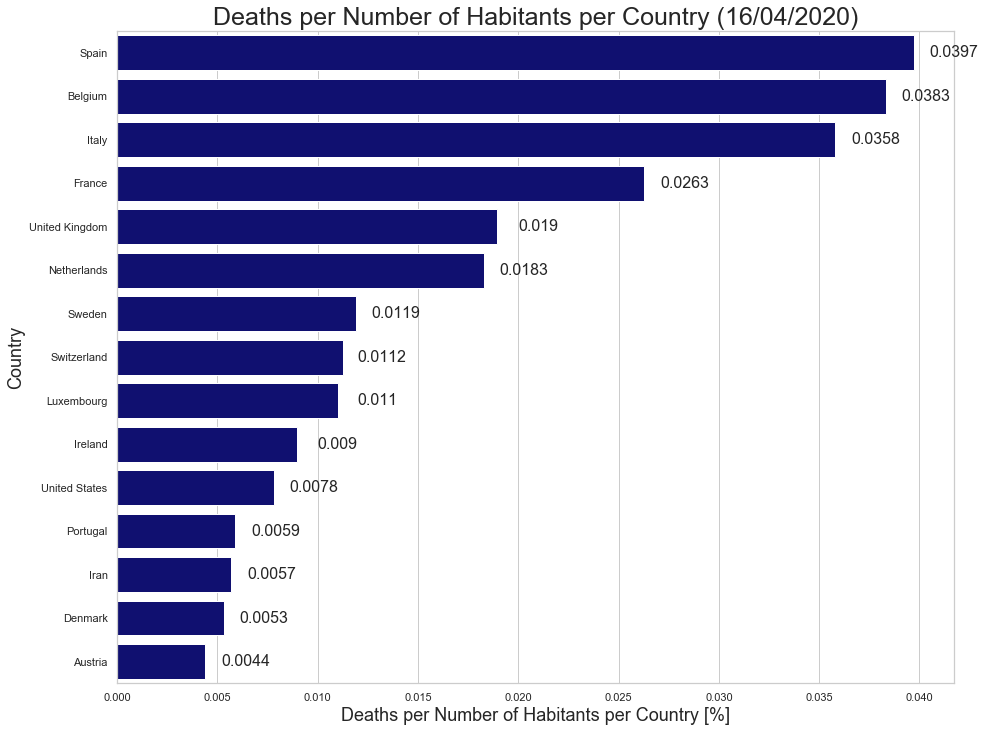

In [18]:
#Deaths per Population contaminated in countries with at least 1000 cases confirmed
#População contaminada em países com no mínimo 1000 casos confirmados 

#mnc = minimum number of cases/número mínimo de casos
mnc = 1000 #define the minimum number of cases here/defina o número mínimo de casos aqui

PopDeathRateMNC = PopDeathRate[PopDeathRate['Total Confirmed'] > mnc]
PopDeathRateMNC = PopDeathRateMNC.reset_index(drop=True)
PopDeathRateMNC.index = np.arange(1, (len(PopDeathRateMNC)+1))
top15_PopDeathRate = PopDeathRateMNC[0:15]
popDeath_rate = top15_PopDeathRate.round({'Population Death Rate %':4})
popDeath_rate = popDeath_rate['Population Death Rate %']

#seaborn defaults
f, ax = plt.subplots(figsize=(15, 12))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Population Death Rate %',y='Country/Territory', data=top15_PopDeathRate ,
            label="Deaths", color="navy")
plt.title('Deaths per Number of Habitants per Country (16/04/2020)',fontsize=25)
plt.xlabel('Deaths per Number of Habitants per Country [%]',fontsize=18)
plt.ylabel('Country',fontsize=18)

for i in range (0,15):
    plt.text(x=popDeath_rate.iloc[i]+0.002, y=i , s=popDeath_rate.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=16)
plt.savefig('Graphs/20200416_DeathRateinPopPerCountry1kCases.png', bbox_inches='tight')
plt.show()

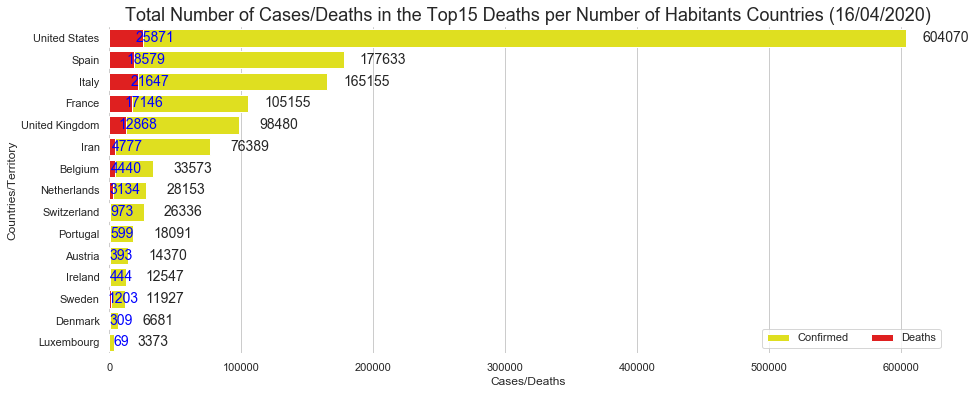

In [19]:
#In the next graph the order will be set by the total number of confirmed cases in the previous countries
#No próximo gráfico a ordem será por número total de casos nos países anteriores


top15PopDeathRate_confirmed_descending = top15_PopDeathRate.sort_values(by=['Total Confirmed'],ascending=False)
confirmedPop = np.array(top15PopDeathRate_confirmed_descending['Total Confirmed'])
deathsPop = np.array(top15PopDeathRate_confirmed_descending['Total Deaths'])

#seaborn defaults
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 6))

sns.set_color_codes("pastel")
sns.barplot(x='Total Confirmed',y='Country/Territory', data=top15PopDeathRate_confirmed_descending,
            label="Confirmed", color="yellow")
sns.set_color_codes("muted")
sns.barplot(x='Total Deaths',y='Country/Territory', data=top15PopDeathRate_confirmed_descending ,
            label="Deaths", color="red")


plt.title('Total Number of Cases/Deaths in the Top15 Deaths per Number of Habitants Countries (16/04/2020)',fontsize=18)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Countries/Territory",
       xlabel="Cases/Deaths")
for i in range (0,15):
    plt.text(x=deathsPop[i]+9000, y=i , s=deathsPop[i],horizontalalignment='center',verticalalignment='center', color='blue',fontsize=14)
    plt.text(x=confirmedPop[i]+30000, y=i , s=confirmedPop[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
sns.despine(left=True, bottom=True)
plt.savefig('Graphs/20200416_TotalNumberCasesDeathsPop.png', bbox_inches='tight')